In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Drawing random samples 
## 35 promotions, 13 no promotions
## 24 men, 24 women

In [11]:
index = ['promotion', 'no promotion']
columns = ['male_sim', 'fem_sim']

In [12]:
male = [-1 for i in range(24)]
female = [1 for i in range(24)]
gender_urn = male + female

In [13]:
promotion_urn = np.random.randint(2, size = 35)
promotion_urn

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1])

In [14]:
len(list(filter(lambda x: x > 0, promotion_urn)))

16

In [15]:
gender_urn_after_promotion_draw = male[:-18]+female[:-17]
gender_urn_after_promotion_draw

[-1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1]

In [16]:
home_urn = np.random.choice(gender_urn_after_promotion_draw, size = 13, replace=False)
home_urn_numbers = Series(home_urn).value_counts()
home_urn_numbers = home_urn_numbers.rename({0: 'male_sim', 1: 'female_sim'})
home_urn_numbers.T

female_sim    7
-1            6
dtype: int64

In [17]:
frame = DataFrame([promotion_urn_numbers, home_urn_numbers], index=index)
f = lambda x: sum(x)
frame["Total"] = frame.apply(f, axis=1)
frame = frame.reindex(['promotion', 'no promotion', 'Total']).fillna(0)
frame.ix[2] = frame.apply(f,axis=0)
frame = frame.T
frame

NameError: name 'promotion_urn_numbers' is not defined

## Simulation function for differences in promotion rates 

In [22]:
def simulation(n):
    
    diff_promo_rates = []
    
    while(n):
    
        promotion_urn = np.random.randint(2, size = 35)
        males_promoted = len(list(filter(lambda x: x > 0, promotion_urn)))   # 1 for male, 0 for female         
        
        diff_promo_rates.append((2 * males_promoted - 35)/35)
        
        n-=1
            
    return diff_promo_rates

In [27]:
plot = simulation(100000)

In [28]:
np.unique(plot)

array([-0.65714286, -0.6       , -0.54285714, -0.48571429, -0.42857143,
       -0.37142857, -0.31428571, -0.25714286, -0.2       , -0.14285714,
       -0.08571429, -0.02857143,  0.02857143,  0.08571429,  0.14285714,
        0.2       ,  0.25714286,  0.31428571,  0.37142857,  0.42857143,
        0.48571429,  0.54285714,  0.6       ,  0.65714286,  0.71428571])

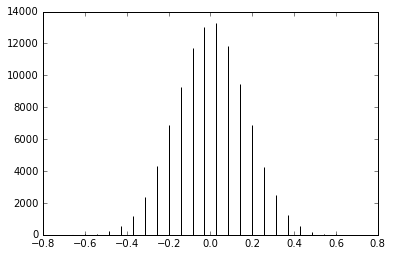

In [29]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(np.array(plot), bins=100000)
plt.show()